## Use face_alignment is very slow

In [1]:
from skimage import io
import face_alignment # very 
import matplotlib.pyplot as plt
import cv2

In [3]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, enable_cuda=True, flip_input=False)

input = io.imread('../data/images/face_test.jpg')

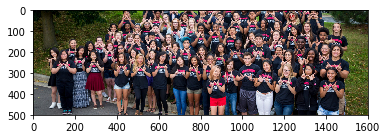

In [4]:
plt.imshow(input)

In [5]:
preds = fa.get_landmarks(input)

In [10]:
len(preds)

1

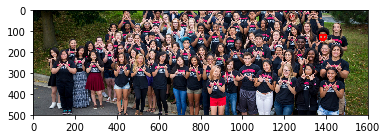

In [7]:
for (x, y, z) in preds[0]:
    cv2.circle(input, (x, y), 1, (255, 0, 0), 5)
plt.imshow(input)

## Detecting blinks with facial landmarks and OpenCV

In [ ]:
from scipy.spatial import distance as dist
from imutils.video import FileVideoStream
from imutils.video import VideoStream
from imutils import face_utils
import cv2
import dlib
import numpy as np
import time


In [ ]:
def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

In [ ]:
from threading import Thread
import cv2
import imutils
class WebcamVideoStream:
    def __init__(self, src=0):
        self.stream = cv2.VideoCapture(src)
        self.stream.set(3, 1920)
        self.stream.set(4, 1080)
        (self.grabbed, self.frame) = self.stream.read()
        
        self.stopped = False
        
    def start(self):
        # Start the thread to read frames from the video stream
        Thread(target=self.update, args=()).start()
        return self
    
    def update(self):
        while True:
            if self.stopped:
                return
            
            (self.grabbed, self.frame) = self.stream.read()
            
    def read(self):
        return self.frame
    
    def stop(self):
        self.stopped = True  

In [ ]:
EYE_AR_THRESH = 0.2
EYE_AR_CONSEC_FRAMES = 20
COUNTER = 0
TOTAL = 0
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/home/neosai/Desktop/neos/ai/face_recognition/src/shape_predictor_68_face_landmarks.dat")
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [ ]:
video_capture = WebcamVideoStream(src=0).start()
while True:
    frame = video_capture.read()
    frame = cv2.flip(frame, 1)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    rects = detector(gray, 0)
    for rect in rects:
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
 
        ear = (leftEAR + rightEAR) / 2.0
    
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
        
        if ear < EYE_AR_THRESH:
            COUNTER += 1
 
        # otherwise, the eye aspect ratio is not below the blink
        # threshold
        else:
            # if the eyes were closed for a sufficient number of
            # then increment the total number of blinks
            if COUNTER >= EYE_AR_CONSEC_FRAMES:
                TOTAL += 1
 
            # reset the eye frame counter
            COUNTER = 0
        cv2.putText(frame, "Blinks: {}".format(TOTAL), (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [1]:
import cv2
import face_alignment
from imutils.video import WebcamVideoStream
import matplotlib.pyplot as plt
from skimage import io

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TypeError: Image data cannot be converted to float

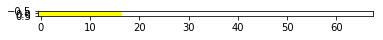

In [2]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, enable_cuda=True, flip_input=False)
video_capture = WebcamVideoStream(src=0).start()
while True:
    frame = video_capture.read()
    preds = fa.get_landmarks(frame)
    
    plt.imshow(preds)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()